In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  # нужно для отображения графиков внутри ноутбука


UsageError: unrecognized arguments: # нужно для отображения графиков внутри ноутбука


In [16]:
data = pd.read_csv('data_task3.csv')

In [17]:
#data.head()
data = data['login;uid;docid;jud;cjud'].str.split(';', 4, expand=True)

In [18]:
data = data.rename(columns={0: 'login', 1: 'uid', 2: 'docid', 3: 'jud', 4: 'cjud'})

In [19]:
data.head()

,login,uid,docid,jud,cjud
0,assessor158,158,0,0,0
1,assessor238,238,0,0,0
2,assessor488,488,0,0,0
3,assessor136,136,0,0,0
4,assessor300,300,0,0,0


In [20]:
data.groupby(['docid']).count().shape[0]
# всего 50000 различных задач

50000

In [21]:
data.groupby(['uid']).count().shape[0]
# всего 600 асессоров

600

In [22]:

#data.groupby('uid')['cjud'].sum()
#df1 = data.groupby('login')['cjud'].sum()
#df1.sort_values(ascending=True).head(10)
data.dtypes

login    object
uid      object
docid    object
jud      object
cjud     object
dtype: object

In [23]:
data['uid'] = data['uid'].astype(str).astype(int)
data['docid'] = data['docid'].astype(str).astype(int)
data['jud'] = data['jud'].astype(str).astype(int)
data['cjud'] = data['cjud'].astype(str).astype(int)

In [24]:
data.dtypes

login    object
uid       int32
docid     int32
jud       int32
cjud      int32
dtype: object

In [25]:
# создаем новый столбец total_points, который будет содержать сумму набранных баллов (cjud) для каждого асессора
data.loc[:, 'total_points'] = 0

In [26]:
data['total_points'] = data.groupby('uid')['cjud'].transform('sum')
data.head()

,login,uid,docid,jud,cjud,total_points
0,assessor158,158,0,0,0,36
1,assessor238,238,0,0,0,50
2,assessor488,488,0,0,0,44
3,assessor136,136,0,0,0,54
4,assessor300,300,0,0,0,53


In [27]:
min_points = data
columns = ['uid', 'docid', 'jud', 'cjud']
min_points.drop(columns, inplace=True, axis=1)
min_points.head()
#data[(data['total_points'] == data['total_points'].min())]
#min_points1 = min_points.drop_duplicates(subset=['login'], keep='first') 

,login,total_points
0,assessor158,36
1,assessor238,50
2,assessor488,44
3,assessor136,54
4,assessor300,53


In [28]:
min_points = min_points.drop_duplicates(subset=['login'], keep='first')

In [29]:
min_points = min_points.sort_values(by=['total_points'], ascending=True)
min_points


,login,total_points
1745,assessor550,13
5175,assessor234,14
852,assessor276,28
147,assessor494,30
197,assessor34,31
389,assessor18,32
245,assessor256,33
307,assessor111,33
54,assessor94,34
133,assessor476,35


Хуже всех справился асессор 550. Однако здесь не учитывается сложность конкретной задачи и относительный показатель (доля правильных ответов в зависимости от количества решенных задач). 

Для этого будем считать относительный показатель (accuracy - доля правильных ответов)

In [30]:
bad_results = data
bad_results.head()

,login,total_points
0,assessor158,36
1,assessor238,50
2,assessor488,44
3,assessor136,54
4,assessor300,53


In [31]:
bad_results = bad_results.drop_duplicates(subset=['login'], keep='first')
bad_results.sort_values(by=['total_points'], ascending=True).head(10)
# Здесь указаны 10 худших асессоров по количеству набранных баллов

,login,total_points
1745,assessor550,13
5175,assessor234,14
852,assessor276,28
147,assessor494,30
197,assessor34,31
389,assessor18,32
245,assessor256,33
307,assessor111,33
54,assessor94,34
133,assessor476,35


###### Однако здесь не учитывается, сколько задач каждый из асессоров выполнял. Может оказаться, что асессор с наименьшей суммой баллов выполнил наименьшее количество задач. Необходимо посчитать долю выполненных задач, и неплохо было бы посмотреть на распределение количества задач на одного асессора. Идельный случай был бы, если получилось бы равномерное распределение.

In [32]:
df = pd.read_csv('data_task3.csv')

In [33]:
df = df['login;uid;docid;jud;cjud'].str.split(';', 4, expand=True)
df = df.rename(columns={0: 'login', 1: 'uid', 2: 'docid', 3: 'jud', 4: 'cjud'})
df.head()

,login,uid,docid,jud,cjud
0,assessor158,158,0,0,0
1,assessor238,238,0,0,0
2,assessor488,488,0,0,0
3,assessor136,136,0,0,0
4,assessor300,300,0,0,0


In [34]:
# меняем тип данных на числовой
df['uid'] = df['uid'].astype(str).astype(int)
df['docid'] = df['docid'].astype(str).astype(int)
df['jud'] = df['jud'].astype(str).astype(int)
df['cjud'] = df['cjud'].astype(str).astype(int)

In [35]:
# добавляем вспомогательные столбцы
# 1. total_points - количество набранных баллов за задачи (cjud)
# 2. num_of_tasks - кол-во выполненных заданий
# 3. accuracy - доля правильных ответов
df.loc[:, 'total_points'] = 0
df['total_points'] = df.groupby('uid')['cjud'].transform('sum')
df.loc[:, 'num_of_tasks'] = 0
df['num_of_tasks'] = df.groupby('login')['uid'].transform('count')
df.loc[:, 'accuracy'] = 0
df['accuracy'] = df['total_points'] / df['num_of_tasks']

In [36]:
df1 = df

In [37]:
df1 = df1.drop_duplicates(subset=['login'], keep='first')

In [38]:
df1.hist(column = 'num_of_tasks', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013E02B8E7B8>]],
      dtype=object)

Как видно из распределения, количесвто выполненных задач асессорами имеет в целом нормальное распределение, однако имеется "хвост" слева, означающий, что есть асессоры, которые решили меньшее количество задач, чем большинство.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013E024C6E48>]],
      dtype=object)

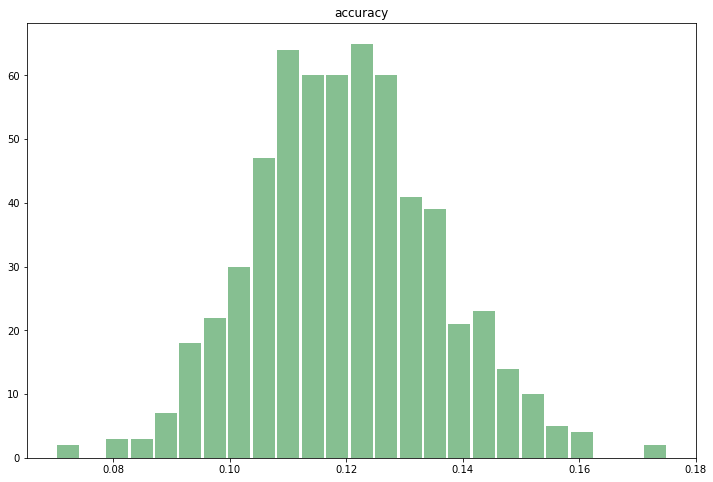

In [39]:
df1.hist(column = 'accuracy', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

Распределение accuracy имеет нормальный вид

In [40]:
df1.sort_values(by=('accuracy'), ascending=True).head(10)
# Здесь указаныы 10 асессоров, которые хуже всего справились с решением задач 
# в относительном показателе (total_points/num_of_tasks)

,login,uid,docid,jud,cjud,total_points,num_of_tasks,accuracy
852,assessor276,276,170,1,1,28,399,0.070175
197,assessor34,34,39,0,0,31,418,0.074163
147,assessor494,494,29,0,0,30,375,0.080000
389,assessor18,18,77,0,0,32,396,0.080808
245,assessor256,256,49,0,0,33,406,0.081281
307,assessor111,111,61,0,0,33,398,0.082915
408,assessor369,369,81,0,0,36,415,0.086747
660,assessor483,483,132,0,0,36,415,0.086747
1151,assessor516,516,230,0,0,39,448,0.087054
28,assessor61,61,5,0,0,37,424,0.087264


Вдобавок хочу отметить, что лучше не ограничиваться только лишь долей правильных ответов. Необходимо учитывать сложность каждой задачи. То есть, может так оказаться, что в выборке существуют сложные и простые задачи. И субъективная степень сложности задачи может повлиять на то, признаем ли мы асессора, как плохо справившегося с задачами или наоборот. Одни асессоры могли решать много сложных задач и поэтому плохо справились, а другие решали более простые задачи и спраились лучше.

Попытаюсь посмотреть на распредеелние задач по показателю: решена правильно/неправильно. А также в целом на частоту встречаемости той или иной задачи.

Создадим для этого новый dataframe.

In [41]:
df2 = df
df2.head()

,login,uid,docid,jud,cjud,total_points,num_of_tasks,accuracy
0,assessor158,158,0,0,0,36,384,0.093750
1,assessor238,238,0,0,0,50,430,0.116279
2,assessor488,488,0,0,0,44,405,0.108642
3,assessor136,136,0,0,0,54,410,0.131707
4,assessor300,300,0,0,0,53,419,0.126492


In [42]:
df2.loc[:, 'task_completed_times'] = 0
df2['task_completed_times'] = df2.groupby('docid')['cjud'].transform('sum')

df2 = df2.drop_duplicates(subset=['docid'], keep='first')

In [43]:
df2

,login,uid,docid,jud,cjud,total_points,num_of_tasks,accuracy,task_completed_times
0,assessor158,158,0,0,0,36,384,0.093750,0
5,assessor123,123,1,1,1,50,402,0.124378,5
10,assessor37,37,2,0,0,55,407,0.135135,0
15,assessor37,37,3,0,0,55,407,0.135135,0
20,assessor132,132,4,0,0,60,423,0.141844,0
25,assessor578,578,5,0,0,54,436,0.123853,0
30,assessor226,226,6,0,0,40,437,0.091533,0
35,assessor379,379,7,0,0,46,444,0.103604,0
40,assessor37,37,8,0,0,55,407,0.135135,0
45,assessor479,479,9,0,0,57,417,0.136691,0


In [44]:
df2[(df2['task_completed_times'] != 0) & (df2['task_completed_times'] != 5)]

,login,uid,docid,jud,cjud,total_points,num_of_tasks,accuracy,task_completed_times


Экспериментальным способом заметил, что в выборке (случайно или нет) получилось так, что задача либо решена 0 раз, либо же решена ровно 5 раз. Других значений нет (код для убедительности представлен выше).

In [45]:
five_times_completed_task = df2[(df2['task_completed_times'] == 5)]
five_times_completed_task

,login,uid,docid,jud,cjud,total_points,num_of_tasks,accuracy,task_completed_times
5,assessor123,123,1,1,1,50,402,0.124378,5
330,assessor144,144,66,1,1,57,419,0.136038,5
350,assessor512,512,70,1,1,62,452,0.137168,5
435,assessor509,509,87,1,1,45,416,0.108173,5
440,assessor304,304,88,0,1,59,411,0.143552,5
490,assessor316,316,98,1,1,60,419,0.143198,5
525,assessor380,380,105,1,1,49,439,0.111617,5
550,assessor195,195,110,1,1,52,423,0.122931,5
560,assessor202,202,112,1,1,45,365,0.123288,5
580,assessor576,576,116,0,1,49,393,0.124682,5


Text(0.5, 1.0, 'Distribution of accuracy')

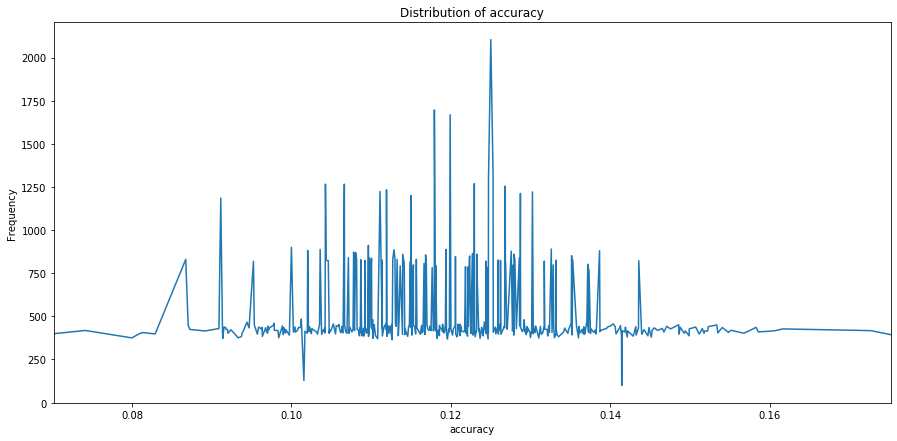

In [49]:
df_graph1 = df[['login', 'accuracy']]
fig, ax = plt.subplots(figsize=(15,7))
df_graph1.groupby('accuracy')['login'].count().plot(ax=ax)
plt.ylabel('Frequency')
plt.title('Distribution of accuracy')